## Observations and Insights 

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

pd.options.display.float_format = '{:,.2f}'.format # Set formatting

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [265]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [266]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_Df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

duplicated_ids_df = pd.DataFrame({"Duplicated Mouse IDs": duplicates_Df["Mouse ID"].unique()  })
duplicated_ids_df

,Duplicated Mouse IDs
0,g989


In [267]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_Df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [268]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]

clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [269]:
# Checking the number of mice in the clean DataFrame.
len(clean_merge_df["Mouse ID"].unique())

248

## Summary Statistics

In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groupby = clean_merge_df.groupby('Drug Regimen')

#drug_regimen_groupby_df = pd.DataFrame({"Tumor Volume": drug_regimen_groupby["Tumor Volume (mm3)"]})

tumor_vol_df = pd.DataFrame({"Mean" : drug_regimen_groupby["Tumor Volume (mm3)"].mean(), 
                             "Median" : drug_regimen_groupby["Tumor Volume (mm3)"].median(),
                            "Mode" : drug_regimen_groupby["Tumor Volume (mm3)"].agg(pd.Series.mode), 
                             "Variance" : drug_regimen_groupby["Tumor Volume (mm3)"].var(),
                             "Standard Dev" : drug_regimen_groupby["Tumor Volume (mm3)"].std(),
                             "SEM" : drug_regimen_groupby["Tumor Volume (mm3)"].sem()             })    

tumor_vol_df


,Mean,Median,Mode,Variance,Standard Dev,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.45,45.00,43.85,6.62,0.54
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [271]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_df.agg(["mean"])




,Mean,Median,Mode,Variance,Standard Dev,SEM
mean,50.98,49.90,45.00,47.86,6.82,0.50


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements')

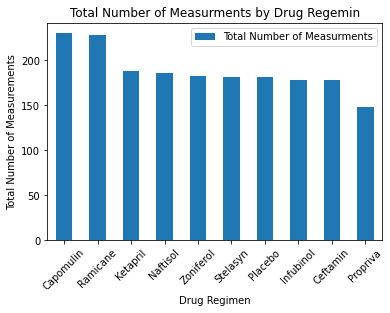

In [274]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_df = pd.DataFrame({"Total Number of Measurments" : clean_merge_df["Drug Regimen"].value_counts()})
#drug_regimen_df

drug_regimen_bar = drug_regimen_df.plot.bar(y="Total Number of Measurments", rot=45)
drug_regimen_bar.set_title("Total Number of Measurments by Drug Regemin")
drug_regimen_bar.set_xlabel("Drug Regimen")
drug_regimen_bar.set_ylabel("Total Number of Measurements")

(0.0, 255.0)

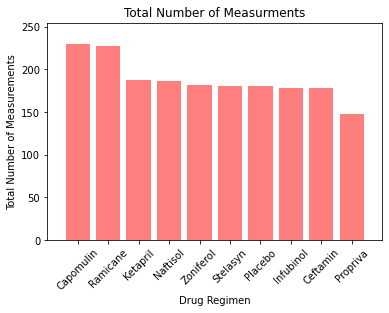

In [275]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
plt.bar(drug_regimen_df.index, drug_regimen_df["Total Number of Measurments"], color='r', alpha=0.5, align="center")

tick_locations = [value for value in drug_regimen_df.index]
plt.xticks(tick_locations, drug_regimen_df.index, rotation=45)
plt.title("Total Number of Measurments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlim(-1, len(drug_regimen_df.index))
plt.ylim(0, max(drug_regimen_df["Total Number of Measurments"])+25)


(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

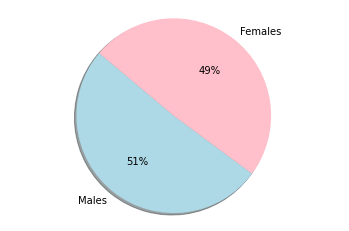

In [276]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Males", "Females"]
gender_counts = clean_merge_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
#explode = (0, 0.05, 0, 0)
plt.pie(gender_counts, labels=labels, colors=colors,
autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis("equal")

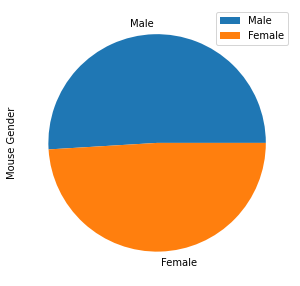

In [277]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender_df = pd.DataFrame({"Mouse Gender" : clean_merge_df["Sex"].value_counts()})

mouse_gender_pie = mouse_gender_df.plot.pie(y="Mouse Gender", figsize=(5,5))
#mouse_gender_df

## Quartiles, Outliers and Boxplots

In [278]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


mouse_final_vol = clean_merge_df.loc[clean_merge_df.groupby(['Drug Regimen', 'Mouse ID'])["Timepoint"].idxmax()]  


Drug Regimen: Capomulin
Lower & Upper Quartiles: 32.38, 40.16
Interquartile range: 7.78  Median Volume: 38.13
Values below 20.71 or above 51.83 could be outliers


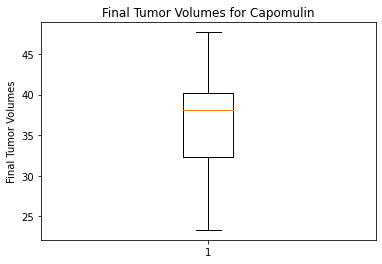



Drug Regimen: Ceftamin
Lower & Upper Quartiles: 48.72, 64.3
Interquartile range: 15.58  Median Volume: 59.85
Values below 25.35 or above 87.67 could be outliers


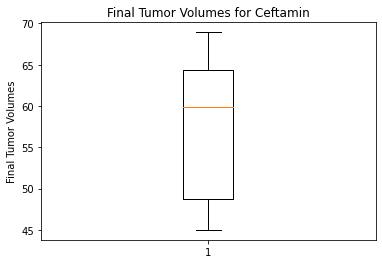



Drug Regimen: Infubinol
Lower & Upper Quartiles: 54.05, 65.53
Interquartile range: 11.48  Median Volume: 60.17
Values below 36.83 or above 82.75 could be outliers
Oulying final tumor volume in Infubinol: 36.3213458


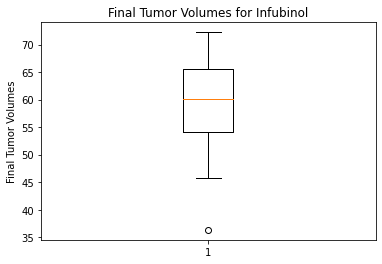



Drug Regimen: Ketapril
Lower & Upper Quartiles: 56.72, 69.87
Interquartile range: 13.15  Median Volume: 64.49
Values below 36.99 or above 89.6 could be outliers


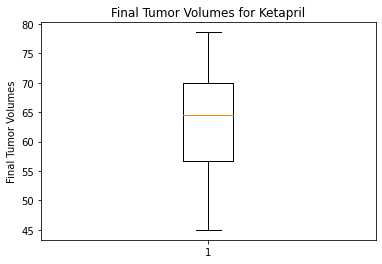



Drug Regimen: Naftisol
Lower & Upper Quartiles: 52.08, 69.56
Interquartile range: 17.48  Median Volume: 63.28
Values below 25.86 or above 95.78 could be outliers


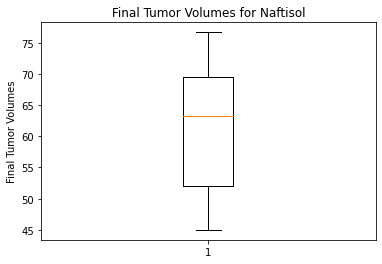



Drug Regimen: Placebo
Lower & Upper Quartiles: 52.94, 68.13
Interquartile range: 15.19  Median Volume: 62.03
Values below 30.15 or above 90.92 could be outliers


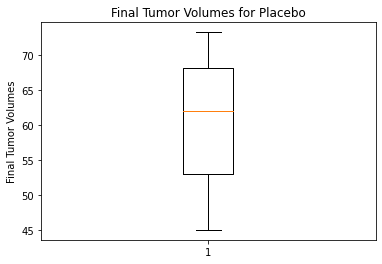



Drug Regimen: Propriva
Lower & Upper Quartiles: 49.12, 62.69
Interquartile range: 13.57  Median Volume: 55.59
Values below 28.76 or above 83.04 could be outliers


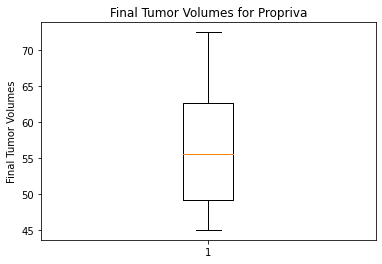



Drug Regimen: Ramicane
Lower & Upper Quartiles: 31.56, 40.66
Interquartile range: 9.1  Median Volume: 36.56
Values below 17.91 or above 54.31 could be outliers


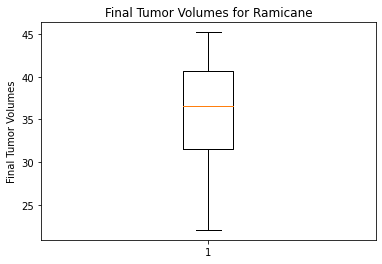



Drug Regimen: Stelasyn
Lower & Upper Quartiles: 52.48, 69.1
Interquartile range: 16.62  Median Volume: 62.19
Values below 27.55 or above 94.03 could be outliers


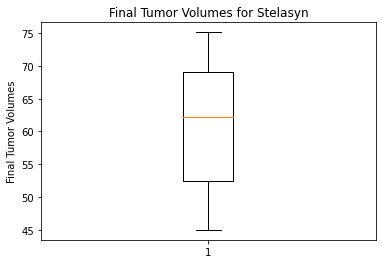



Drug Regimen: Zoniferol
Lower & Upper Quartiles: 49.99, 66.79
Interquartile range: 16.8  Median Volume: 61.84
Values below 24.79 or above 91.99 could be outliers


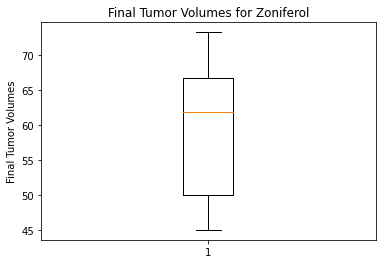

In [279]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = mouse_final_vol["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in drug_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    regimen_specific_rows = mouse_final_vol.loc[merge_df["Drug Regimen"] == regimen]

    # add subset 
    
    tumor_vol_data.append(regimen_specific_rows)
    
    tumor_volumes = regimen_specific_rows["Tumor Volume (mm3)"]

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2) 
    iqr = round(upperq-lowerq, 2)

    print(f"Drug Regimen: {regimen}")
    print(f"Lower & Upper Quartiles: {lowerq}, {upperq}") 
    print(f"Interquartile range: {iqr}  Median Volume: {round(quartiles[0.5], 2)}")
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"Values below {lower_bound} or above {upper_bound} could be outliers")

    for row in tumor_volumes:
        if row > upper_bound or row < lower_bound:
            print(f"Oulying final tumor volume in {regimen}: {row}")
    
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volumes for {regimen}')
    ax1.set_ylabel('Final Tumor Volumes')
    ax1.boxplot(tumor_volumes)
    plt.show()
    
    print ("\n")

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#SEE ABOVE

## Line and Scatter Plots

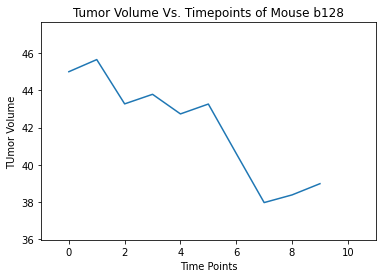

In [231]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'b128'
merge_df_mouse = merge_df.loc[merge_df["Mouse ID"] ==mouse_id]
volumes = merge_df_mouse['Tumor Volume (mm3)']
timepoint = merge_df_mouse['Timepoint']

timepoint_count = timepoint.count()
timepoint_count
x_axis = np.arange(0, timepoint_count, 1)

plt.xlim(-1, timepoint_count+1)
plt.ylim(volumes.min()-2, volumes.max()+2)
plt.title(f"Tumor Volume Vs. Timepoints of Mouse {mouse_id}")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume")

plt.plot(x_axis, volumes)
plt.show()

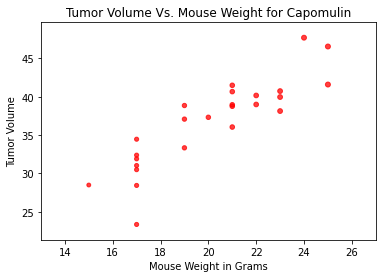

In [243]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_regimen = 'Capomulin'
mouse_final_vol = mouse_final_vol.loc[mouse_final_vol["Drug Regimen"] == drug_regimen]

ave_volume = mouse_final_vol['Tumor Volume (mm3)']
mouse_weight = mouse_final_vol['Weight (g)']

plt.xlim(mouse_weight.min()-2, mouse_weight.max()+2)
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)
plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")

plt.scatter(mouse_weight, ave_volume, marker="o", facecolors="red", s=mouse_weight, alpha=0.75)
plt.show()

## Correlation and Regression

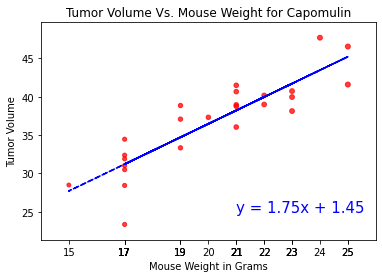

In [263]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = stats.linregress(mouse_weight, ave_volume)


# Create equation of line to calculate predicted violent crime rate

regress_values = mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.xlim(mouse_weight.min()-1, mouse_weight.max()+1)
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)
plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")
plt.annotate(line_eq,(21,25),fontsize=15,color="blue")
plt.scatter(mouse_weight, ave_volume, marker="o", facecolors="red", s=mouse_weight, alpha=0.75)
plt.plot(mouse_weight, regress_values,"b--")
plt.xticks(mouse_weight, rotation=0 )

plt.show()